<a href="https://colab.research.google.com/github/allenthemartian/CNN/blob/main/Fandango.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to limit output cell size

from google.colab.output import eval_js

def set_cell_size(height=250):
  '''
  Sets the colab cell output size.  

  **Default:** `height` = 250
  '''
  height = str(height)
  return eval_js(f'google.colab.output.setIframeHeight({height})')

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

Problem: Real World $\rightarrow$
1. Problem to Solve (How to fix or change $X$)
OR
2. Question to Answer (How does a change in X affect Y?)


Workflow: 

1. Collect & Store Data
2. Clean and Organize Data
3. EDA $\rightarrow$ Report, Visualization, Communication  $\longrightarrow$ Data Analysis  $\rightarrow$ Make Decisions/Answer Key Questions   

Question to Answer for today:  

Is there a conflict of interest for a website that sells movie tickets **and** displays review ratings?  

YEAR 2015  

* Fandango Sells movie tickets online  
* Also displays movie ratings  (*Fan ratings*)  

Fandango also has a surchage on top of movie ticket prices, for the service that they provide.

TAKEN 3 had a 4.5 star rating on Fandango (13% on Rotten Tomatoes)  

Can we answer this question with **data analysis**

https://en.wikipedia.org/wiki/Fandango_Media#Controversies  

Specifically:  

Does a website like Fandango, artificiallly display higher review ratings to sell more movie tickets?  

https://fivethirtyeight.com/features/fandango-movies-ratings/  

`Pandas` to Organize, `Seaborn` to Explore  

Things to know:  
Fandango has two ratings:  

* Stars - Rating in 0-5 displayed on their website's HTML  
* Rating - Actual True Rating numerically shown on movie's page. (4.3 rounded up to 4.5)  

1. First we will compare the true numerical rating that Fandango holds in it's backend against what it displays to the users, and compare these ratings to check for discrepencies. 

2. Then compare Fandango's rating to other rating website scores: 

There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.  

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.  

-----

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb  

-----  

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.



Q: Is there a discrepancy b/w **RATING**  and **STARS** displayed to people visiting the site.   

* Visualization  
* Calculations  
* Correaltion b/w ratings and number of votes (explore the relationship between popularity of a film and its rating)   
* Movies with highest number of votes  
* Movies with Zero Votes
* Quantify the Discrepancy  
* Comparison of Fandango Ratings to Other Sites
* Normalize Scores (0-100, 0-5)
* Explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

Is it ok to round up by 0.5, is that perfectly reasonable or is there something more to it. 

# Exploring Fandango Displayed Scores versus True User Ratings
Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

In [ ]:
filepath_fandango = "/content/drive/MyDrive/Classroom/fandango_scrape.csv"
filepath_all = "/content/drive/MyDrive/Classroom/all_sites_scores.csv"

Explore the dataframe properties and head

In [ ]:
fdf = pd.read_csv(filepath_fandango)

In [ ]:
fdf.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


It is difficult to display 3.9 stars, 4.0 is definitely easire

In [ ]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
fdf.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


avg. stars vs. avg. rating  

# Explore the relationship between popularity of a film and its rating.

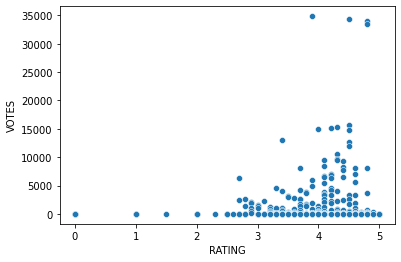

In [ ]:
sns.scatterplot(data=fdf, #source
                x='RATING',
                y='VOTES');

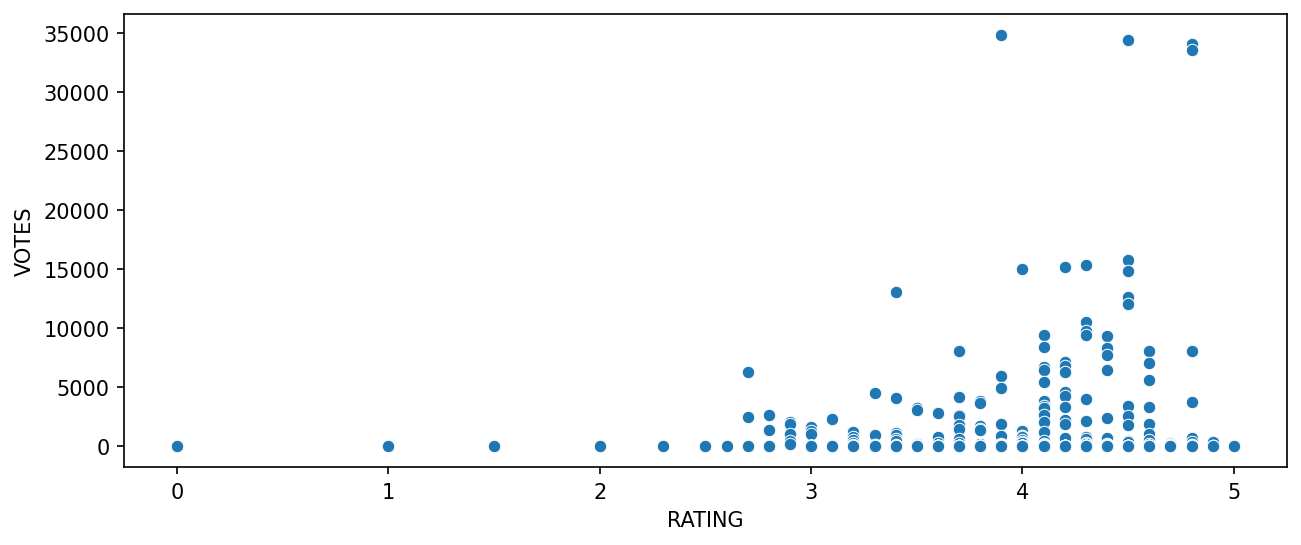

In [ ]:
# Adjusting the size
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=fdf,
                x='RATING',
                y='VOTES');

## Correlation

In [ ]:
fdf.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Stars and Rating are NOT PERFECTLY Correlated (some discrepancy) 

Assuming that every row in the FILM title column has the same format:  

 Film Title Name (Year)
    
* Create a new column that is able to strip the year from the title strings and set this new column as YEAR 

In [ ]:
fdf.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
sample_title = "American Sniper (2015)"

In [ ]:
sample_title.split('(')

['American Sniper ', '2015)']

In [ ]:
sample_title.split('(')[-1]

'2015)'

In [ ]:
sample_title.split('(')[-1].replace(")", "")

'2015'

In [ ]:
fdf['YEAR'] = fdf['FILM'].apply(lambda x:x.split('(')[-1].replace(")", ""))

In [ ]:
fdf

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


Right now the `Year` column is a string, but we don't need to translate it to anything else.

**Q: How many movies are in the Fandango DataFrame per year?** 

In [ ]:
fdf['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Visualise the Count of movies per year with a plot

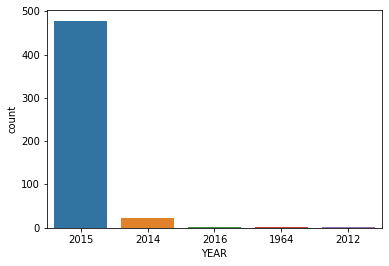

In [ ]:
sns.countplot(data=fdf,
              x='YEAR');

Same information, but shown visually.

**What are the 10 movies with the highest number of votes?**

(n=5, keep="first") -> Series
Return the largest n elements.

Parameters

n : int, default 5
    Return this many descending sorted values.  
keep : {'first', 'last', 'all'}, default 'first'  
    When there are duplicate values that cannot all fit in a Series of n elements:

In [ ]:
fdf.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


Looks like the dataframe is already sorted by votes, but let's not assume and go ahead and sort it. 

**How many votes have zero votes?**



In [ ]:
filt = fdf['VOTES'] == 0

In [ ]:
fdf[filt]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


$69$ rows. 

**Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [ ]:
filt = fdf['VOTES']>0

In [ ]:
fdf[filt]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [ ]:
rev_df = fdf[filt]

As noted, due to HTML and star rating displays: 

The true user rating may be slightly different than the rating shown to a user. 

Let's visualize this difference in distributions.

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

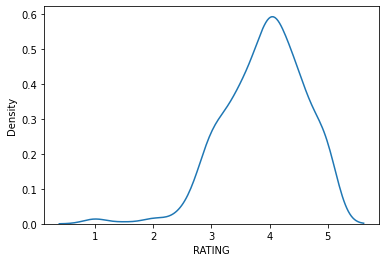

In [ ]:
sns.kdeplot(data=rev_df,x='RATING')

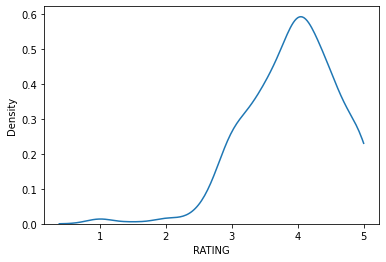

In [ ]:
sns.kdeplot(data=rev_df,x='RATING',clip=[0,5])

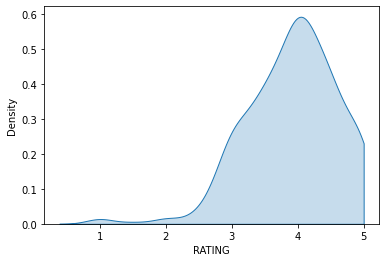

In [ ]:
sns.kdeplot(data=rev_df,x='RATING',clip=[0,5],fill=True,label='True Rating')

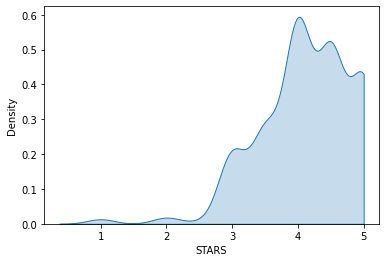

In [ ]:
sns.kdeplot(data=rev_df,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

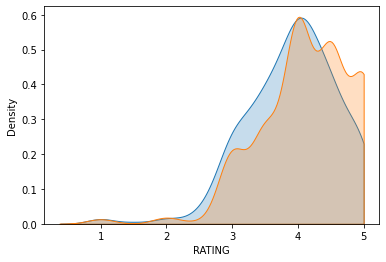

In [ ]:
sns.kdeplot(data=rev_df,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=rev_df,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

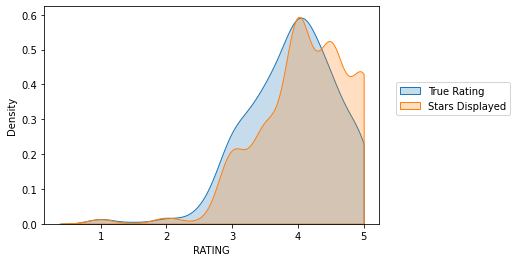

In [ ]:
sns.kdeplot(data=rev_df,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=rev_df,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')
plt.legend(loc=(1.05, 0.5)) # Move Legend

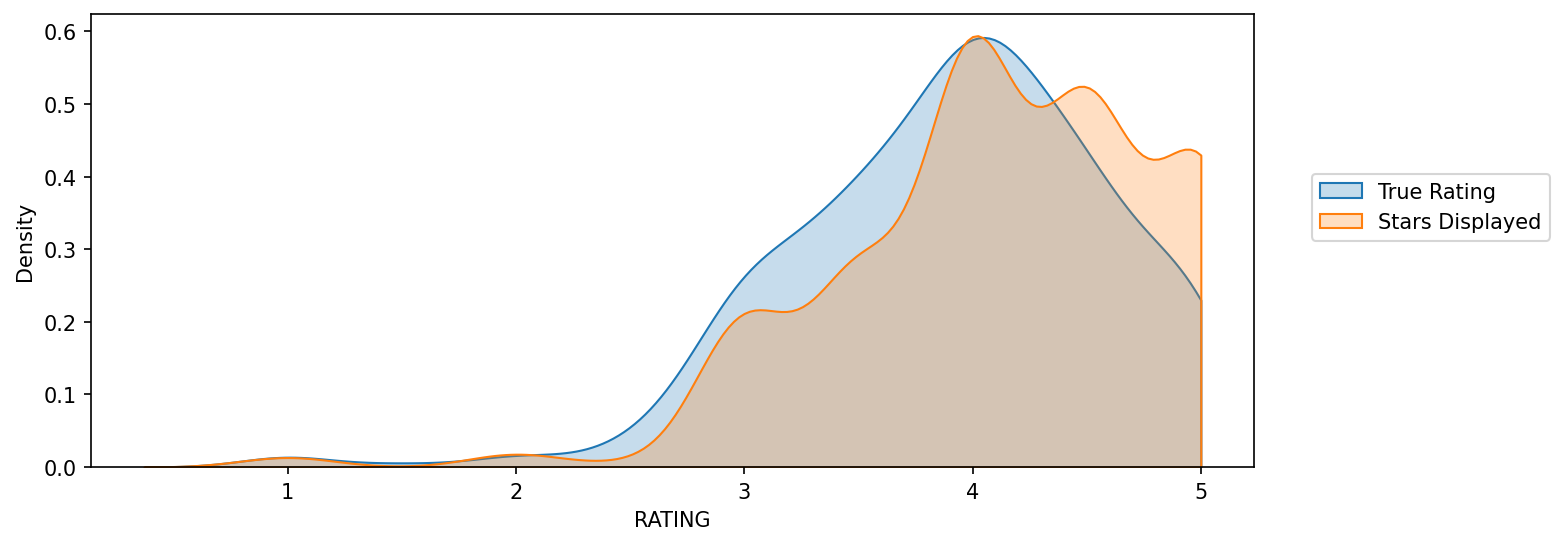

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.kdeplot(data=rev_df,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=rev_df,x='STARS',clip=[0,5],fill=True,label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

Doesn't have to be KDE, but it is useful.

 Let's now actually quantify this discrepancy. Create a new column of the different between `STARS` displayed versus true `RATING`. Calculate this difference with `STARS-RATING` and round these differences to the nearest decimal point.

In [ ]:
rev_df

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


In [ ]:
rev_df["STARS_DIFF"] = rev_df['STARS'] - rev_df['RATING'] 
# fdf['STARS_DIFF'] = fdf['STARS_DIFF'].round(2)fdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Warning is because, `rev_df` is itself a copy of a slice from a dataframe.  

Very common warning, it's ok to get this warning.

In [ ]:
rev_df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


The more copies of dataframes we create, the more RAM we take up

In [ ]:
rev_df['STARS_DIFF'] = rev_df['STARS_DIFF'].round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rev_df

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


4	Inside Out (2015)	4.5	4.5	15749	2015	0.0

**Create a count plot to display the number of times a certain difference occurs:**

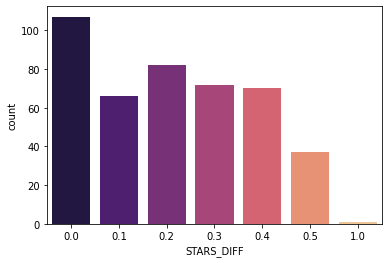

In [ ]:
sns.countplot(data=rev_df,
              x='STARS_DIFF',
              palette='magma');

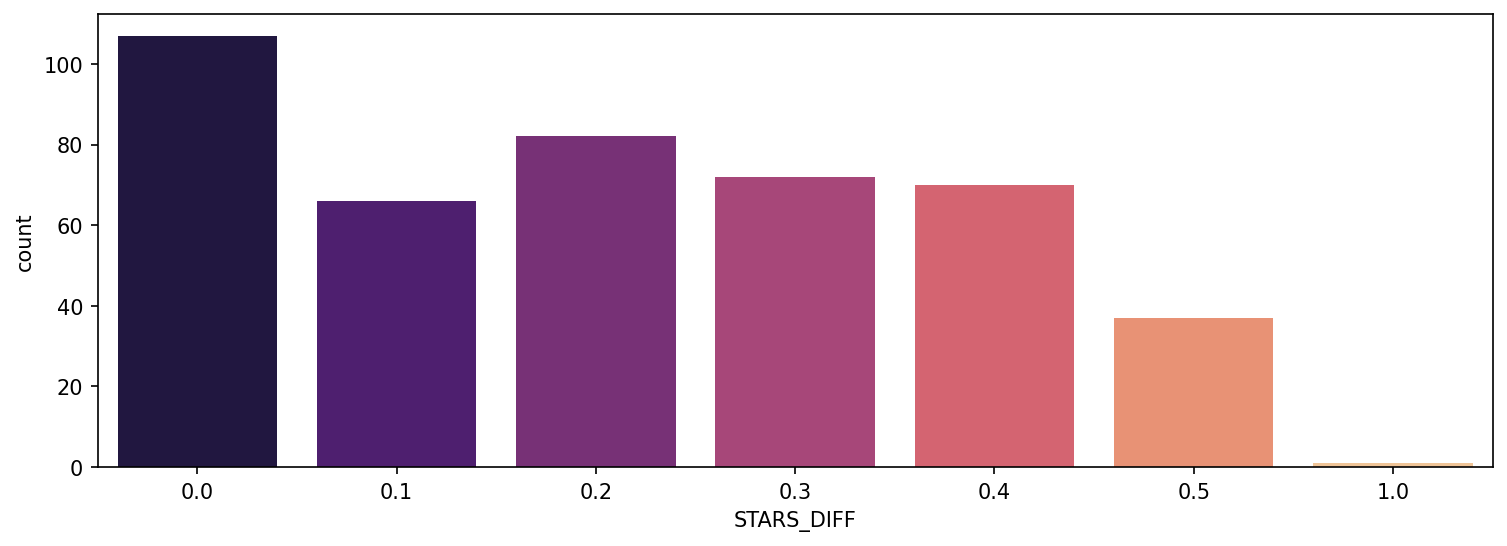

In [ ]:
plt.figure(figsize=(12,4),dpi=150)
sns.countplot(data=rev_df,x='STARS_DIFF',palette='magma')

A little over 100 movies where the true numerical rating is the exact same as the stars being shown.  

There's actually 1 movie where the stars being displayed is 1 higher than the true rating.

In [ ]:
rev_df[rev_df['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


Its a crazy difference.

There are more movies, with different set of stars than total matches. 

# Comparison of Fandango Ratings to Other Sites

In [ ]:
adf = pd.read_csv(filepath_all)

Let's now compare the scores from Fandango to other movies sites and see how they compare.

In [ ]:
adf.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


adf --> Movies that had atleast 30 reviews

In [ ]:
adf.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews.

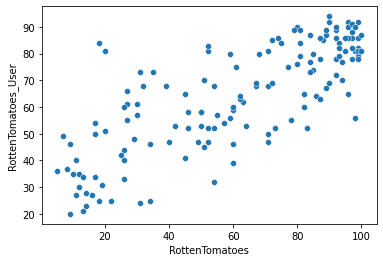

In [ ]:
sns.scatterplot(data=adf,x='RottenTomatoes',y='RottenTomatoes_User')

If critics like the movie, generally, users also like movies.  

Small cluster of movies, where both of them liked. 

(0.0, 100.0)

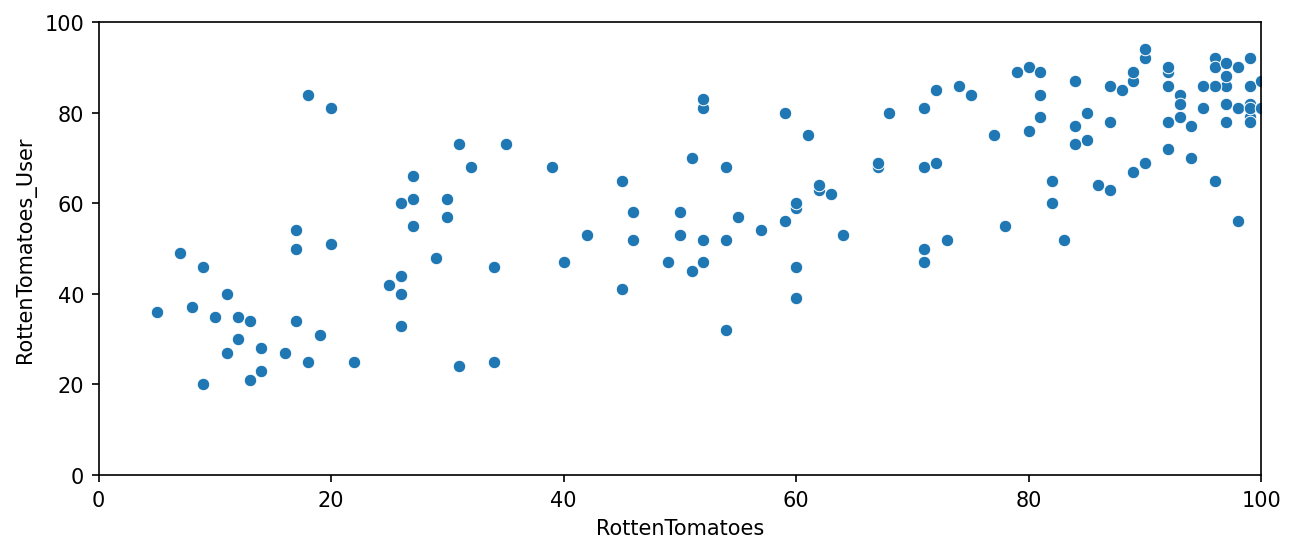

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=adf,x='RottenTomatoes',y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100) # TO make the scale more sensible

Quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with `RottenTomatoes-RottenTomatoes_User`.

Note: Rotten_Diff here is Critics - User Score.

So values closer to 0 means **aggrement** between Critics and Users.

Larger positive values means **critics rated much higher than users**.  

Larger negative values means **users rated much higher than critics**.  

In [ ]:
adf['Rotten_Diff']  = adf['RottenTomatoes'] - adf['RottenTomatoes_User']

In [ ]:
adf.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


We can **Calculate the Mean Absolute Difference** between RT scores and RT User scores as described above.  

On AVERAGE, how far off are critic ratings and user ratings.   

Take the ABSOLUTE VALUE, bc we have both negative and positive value, and given that the differences seem to be normally distributed, the MEAN will be close to ZERO.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f72e6f8af50>]],
      dtype=object)

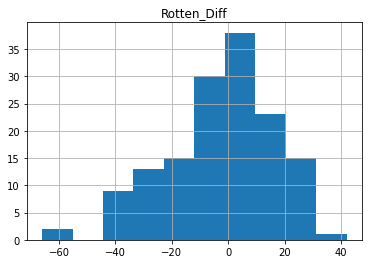

In [ ]:
adf.hist('Rotten_Diff')

In [ ]:
adf['Rotten_Diff'].apply(abs).mean()

15.095890410958905

This is just the ABS difference in rating 

 Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.

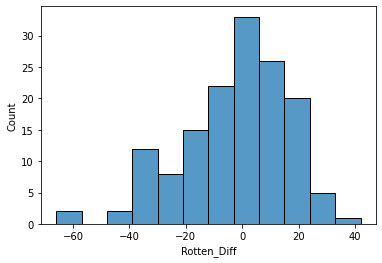

In [ ]:
sns.histplot(data=adf,x='Rotten_Diff')

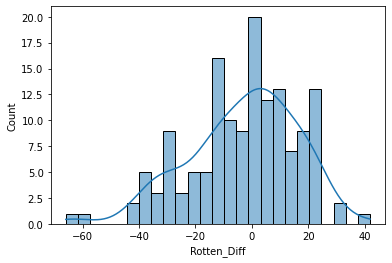

In [ ]:
sns.histplot(data=adf,x='Rotten_Diff',kde=True,bins=25) # Expand the bin size a little bit

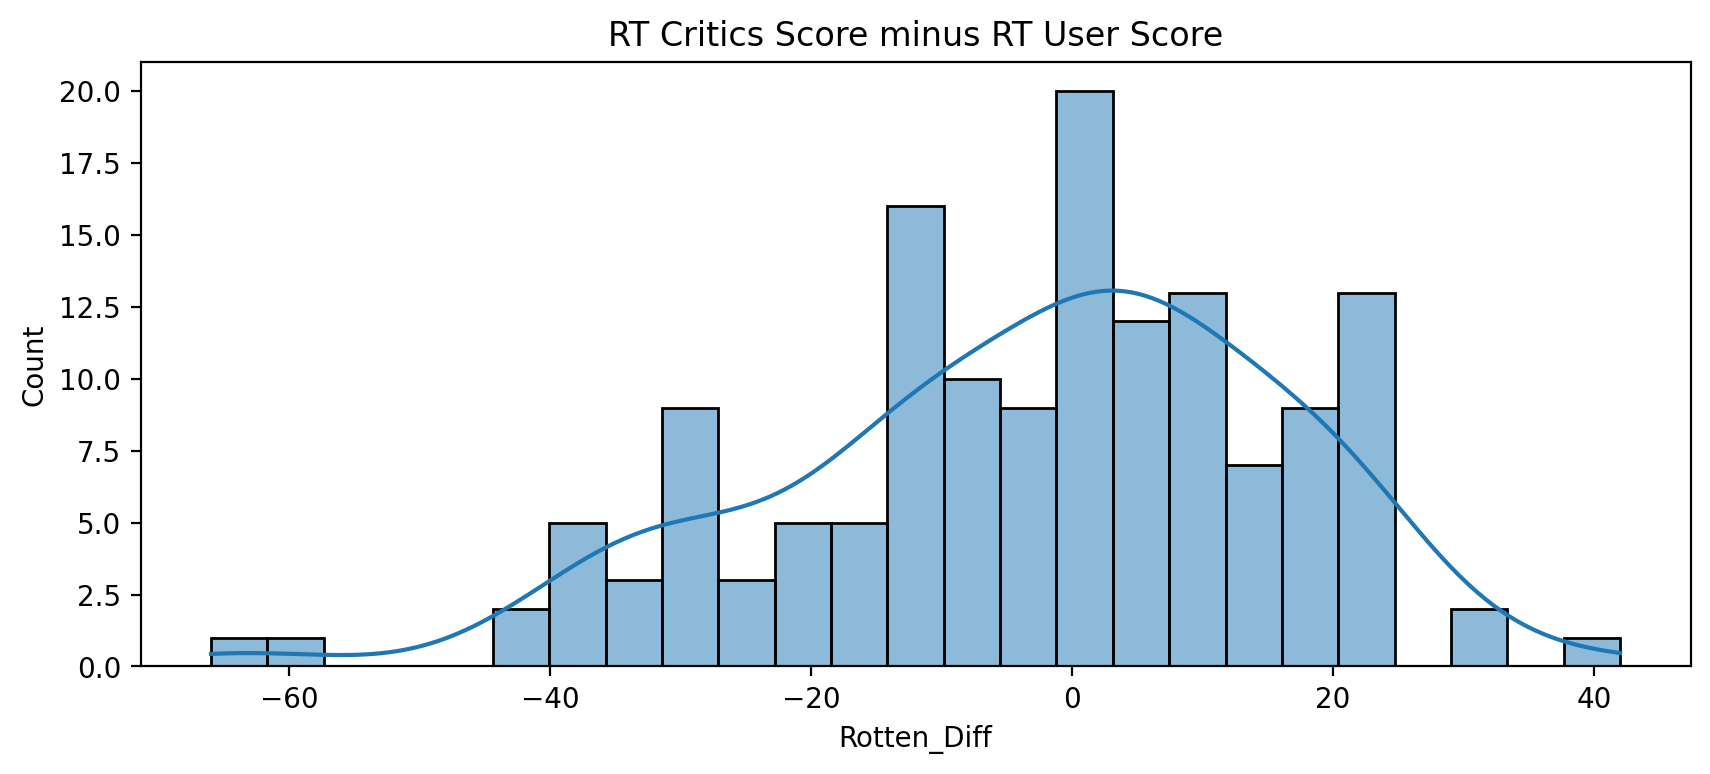

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=adf,x='Rotten_Diff',kde=True,bins=25)
plt.title("RT Critics Score minus RT User Score");

Now create a distribution showing the absolute value difference between Critics and Users on Rotten Tomatoes.

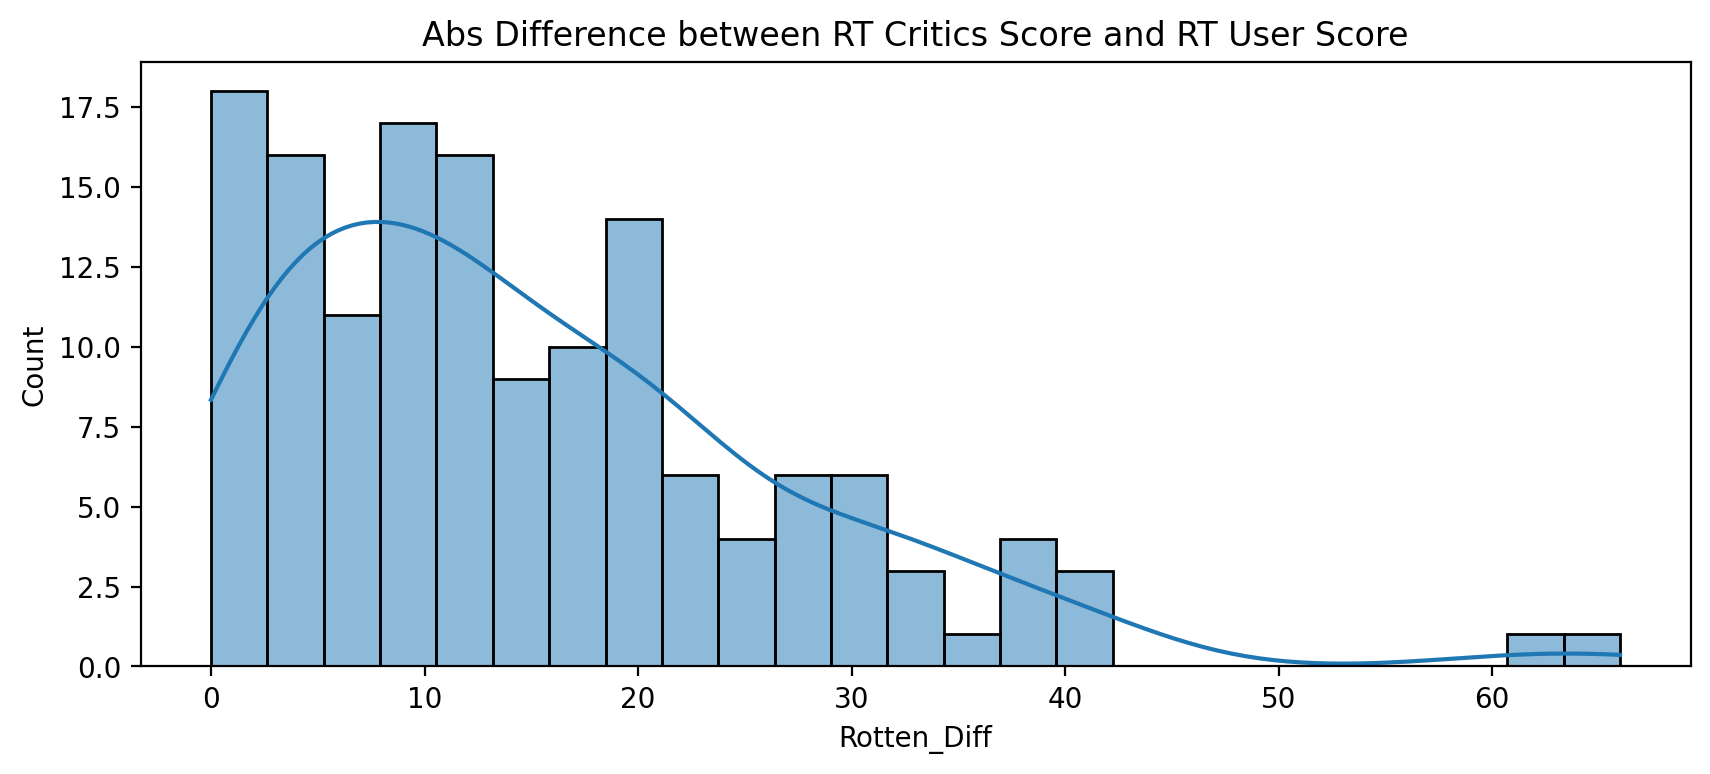

In [ ]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(x=adf['Rotten_Diff'].apply(abs),bins=25,kde=True) # take in the raw series
plt.title("Abs Difference between RT Critics Score and RT User Score");

Let's find out which movies are causing the largest differences.

First, show the top 5 movies with the largest negative difference between Users and RT critics.

Since we calculated the difference as Critics Rating - Users Rating,

then large negative values imply the users rated the movie much higher on average than the critics did.

**We are looking for *nsmallest()* of that difference.**

In [ ]:
adf.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [ ]:
adf.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


These are the movies that USERS really liked a LOT more than CRITICS.

What about the opposite?

In [ ]:
print("Critics love, but Users Hate")
adf.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


# METACRITIC

Let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

(0.0, 100.0)

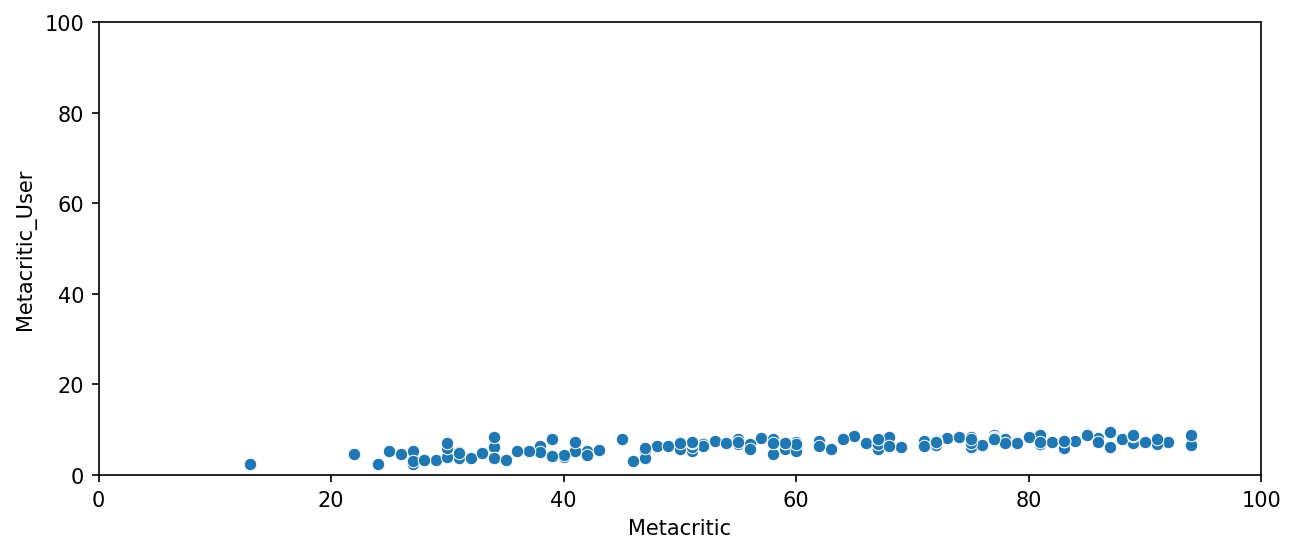

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=adf,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,100)

(0.0, 10.0)

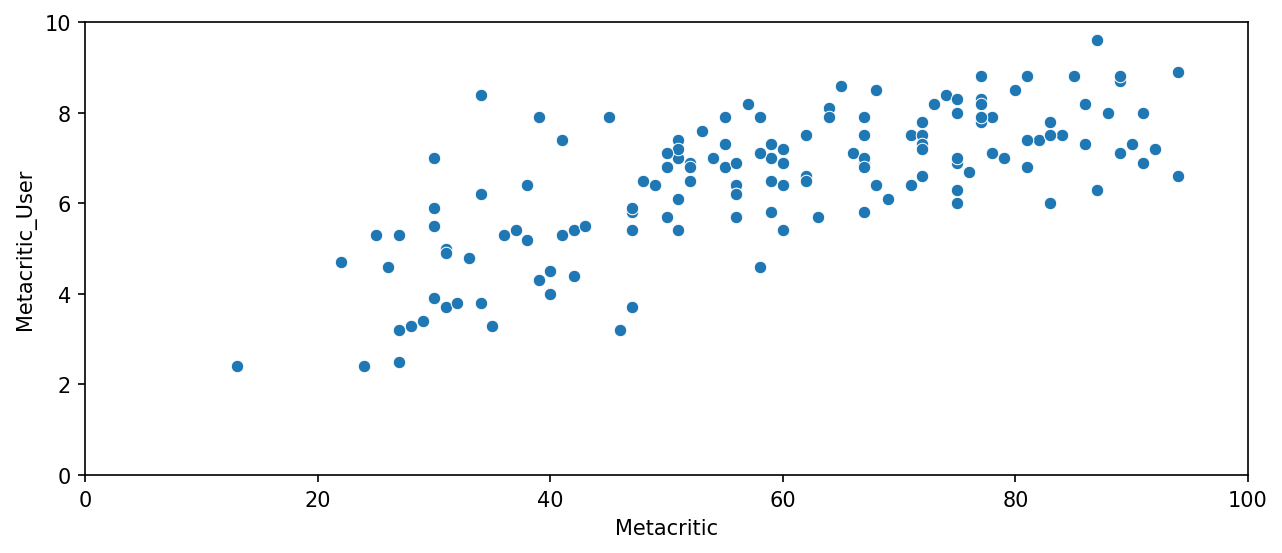

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=adf,x='Metacritic',y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

# IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.

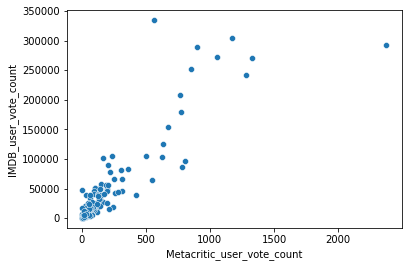

In [ ]:
sns.scatterplot(data=adf,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

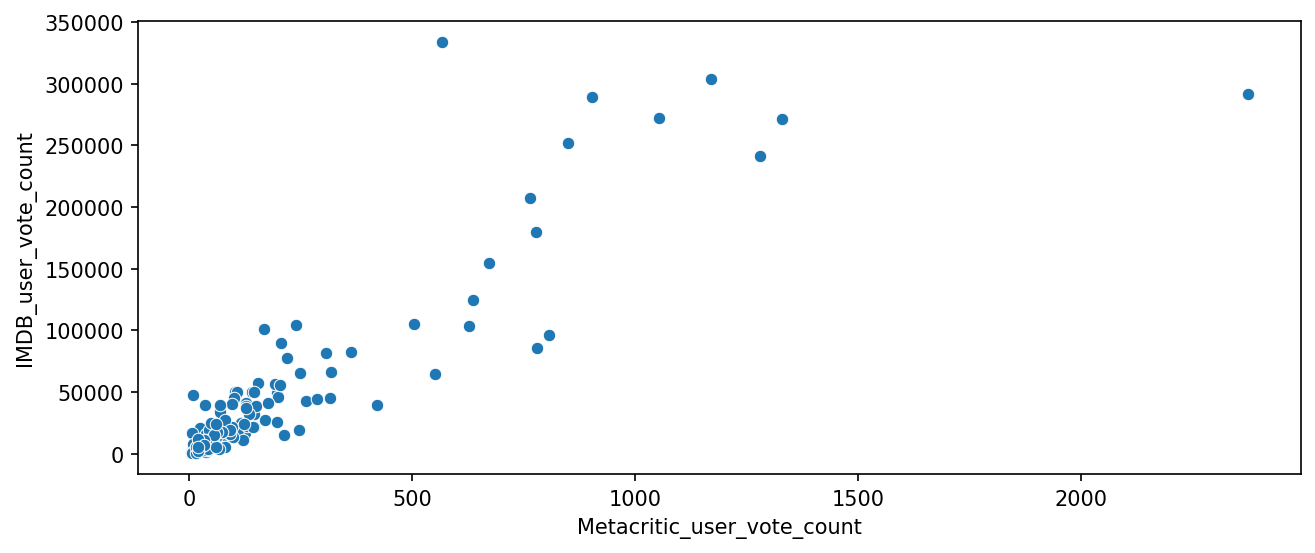

In [ ]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=adf,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?

In [ ]:
adf.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [ ]:
adf.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

WE need to NORMALIZE THE DATA, because of the different scales of scoring.  

Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews.

We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.

In [ ]:
fdf.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


In [ ]:
adf.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


In [ ]:
df = pd.merge(fdf,adf,on='FILM',how='inner')

In [ ]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [ ]:
fdf.shape, adf.shape, df.shape

((504, 5), (146, 9), (145, 13))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [ ]:
df.describe().T['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

df['_Norm'] = np.round(df['']/20, 1)  
df['_Norm'] = np.round(df['']/20, 1)  

$X$ = 5

In [ ]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

In [ ]:
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)

In [ ]:
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)


In [ ]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


Compare stars and ratings

In [ ]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [ ]:
# Coppy and paste list
norm_scores = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']] # Also grab stars and rating

In [ ]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

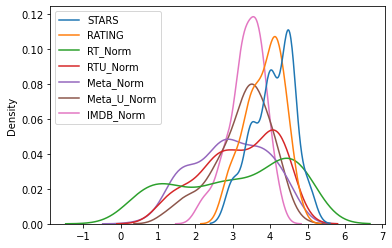

In [ ]:
sns.kdeplot(data=norm_scores)

Clip the negative values

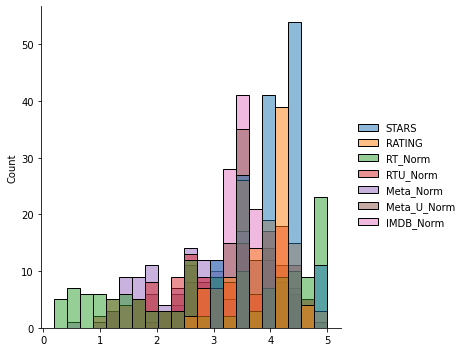

In [ ]:
sns.displot(data=norm_scores)

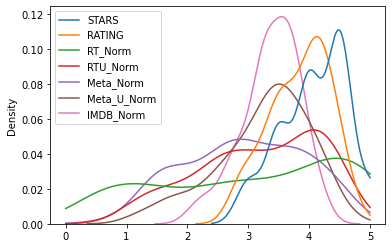

In [ ]:
sns.kdeplot(data=norm_scores,clip=[0,5])

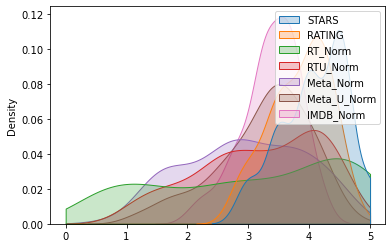

In [ ]:
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True)

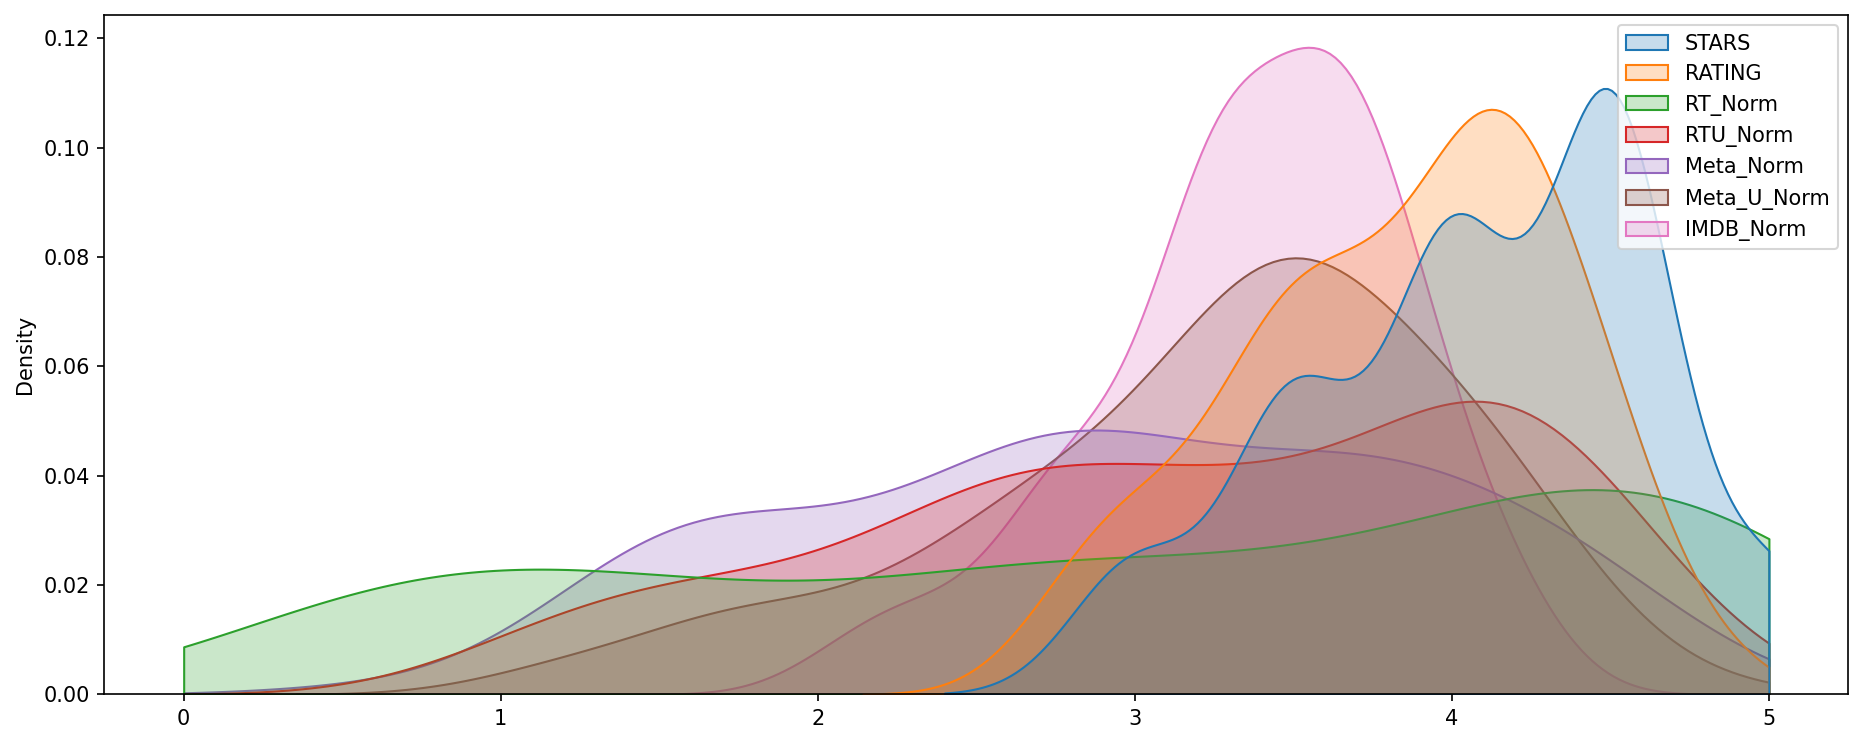

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True)

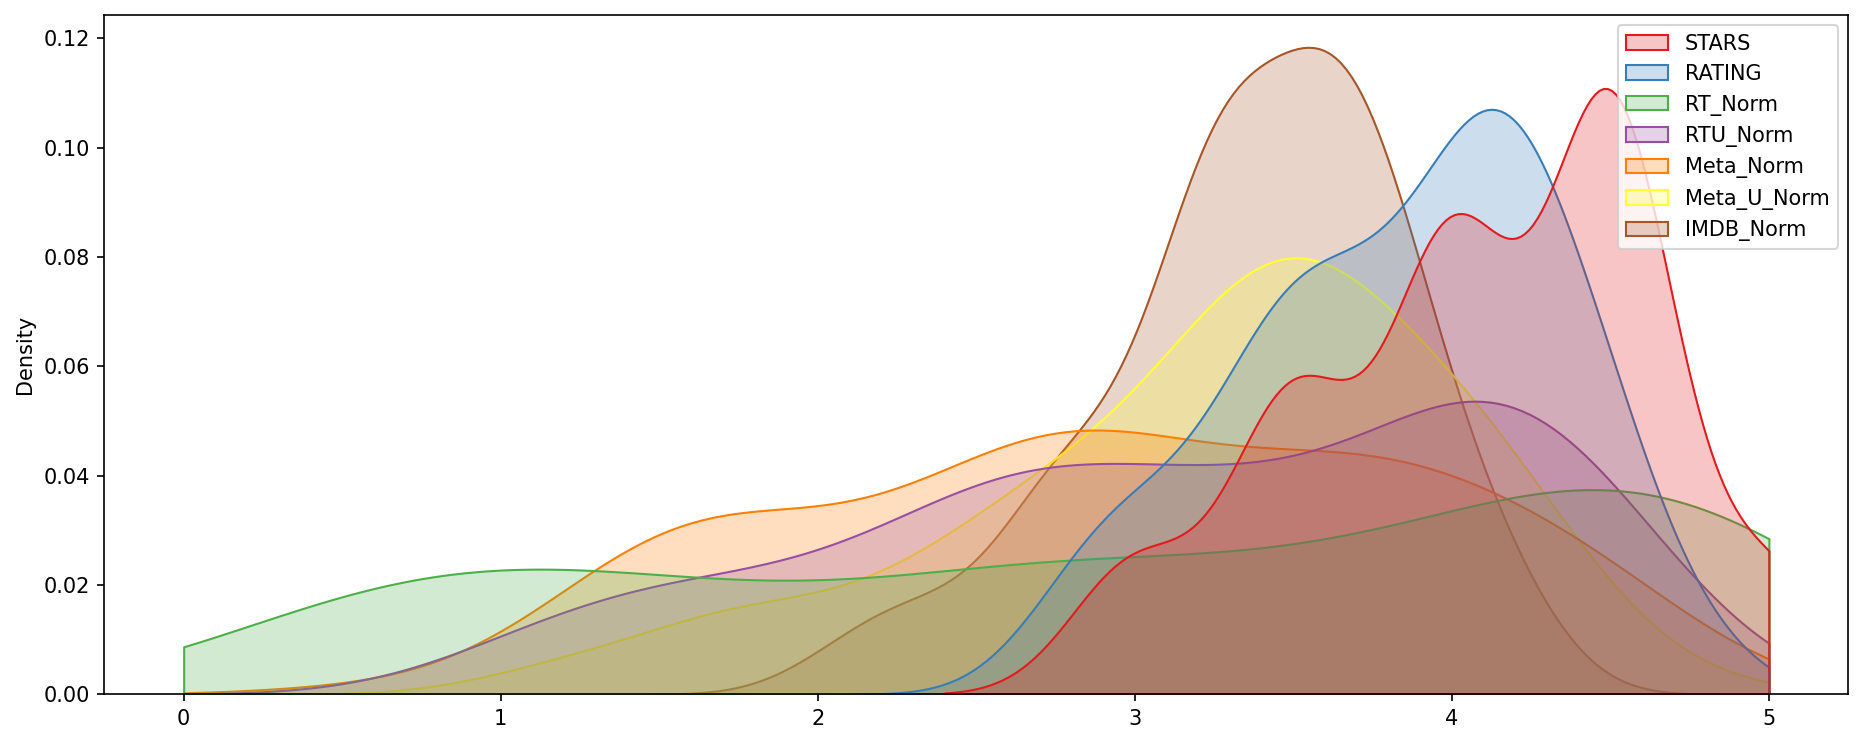

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')

Maybe the users on FANDANGO really LOVE movies.

No handles with labels found to put in legend.


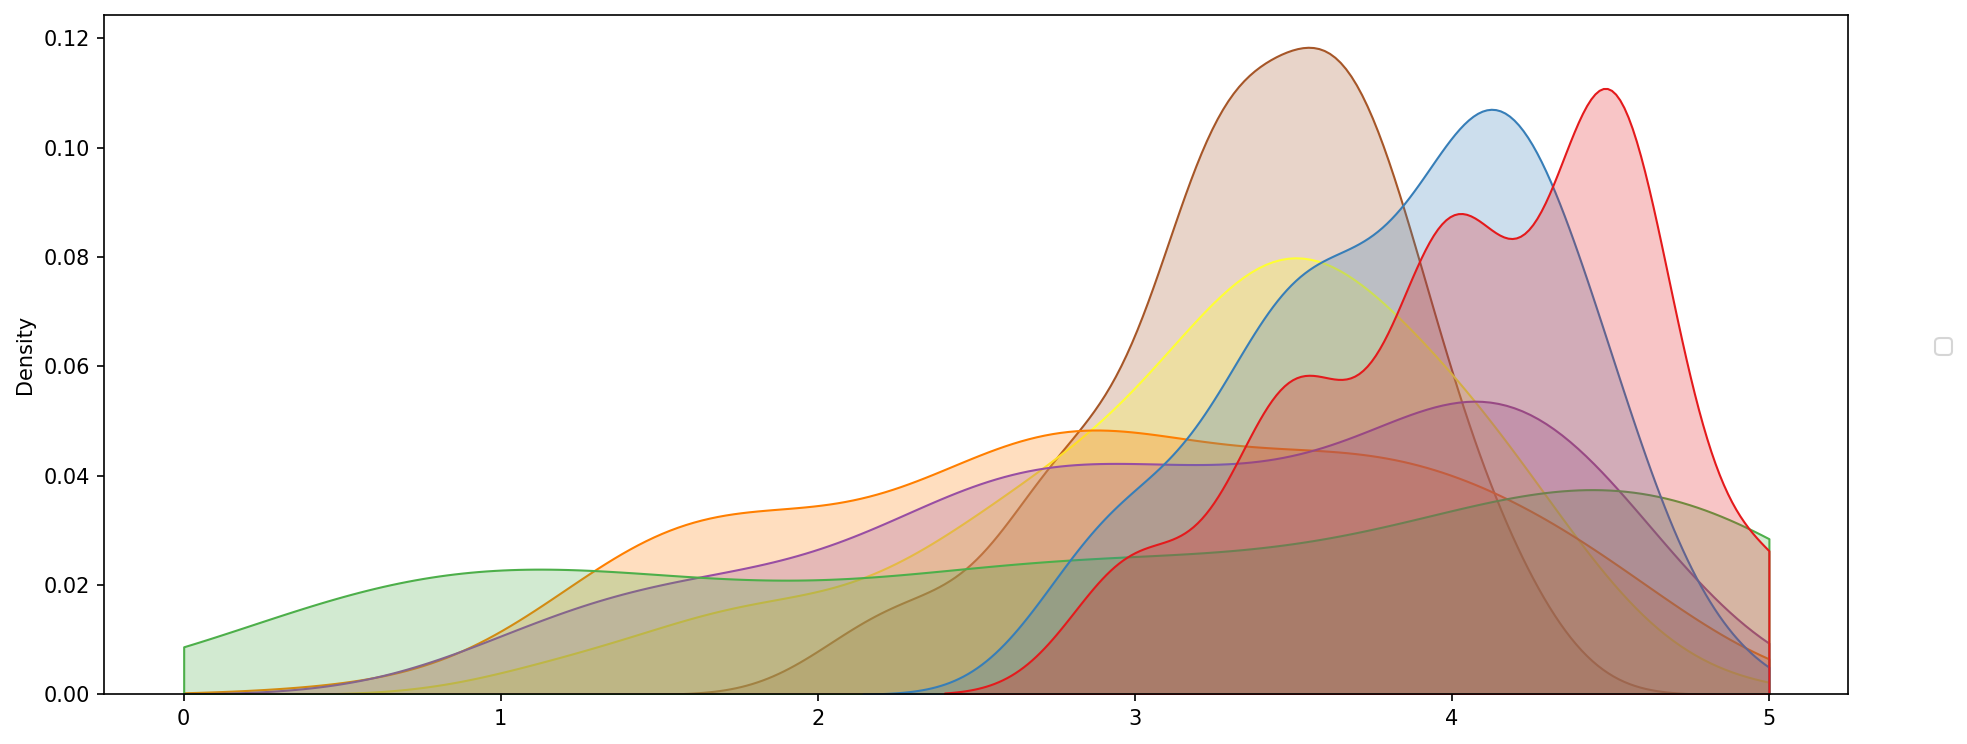

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1', ax=ax)
plt.legend(loc=(1.05, 0.5))

In [ ]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

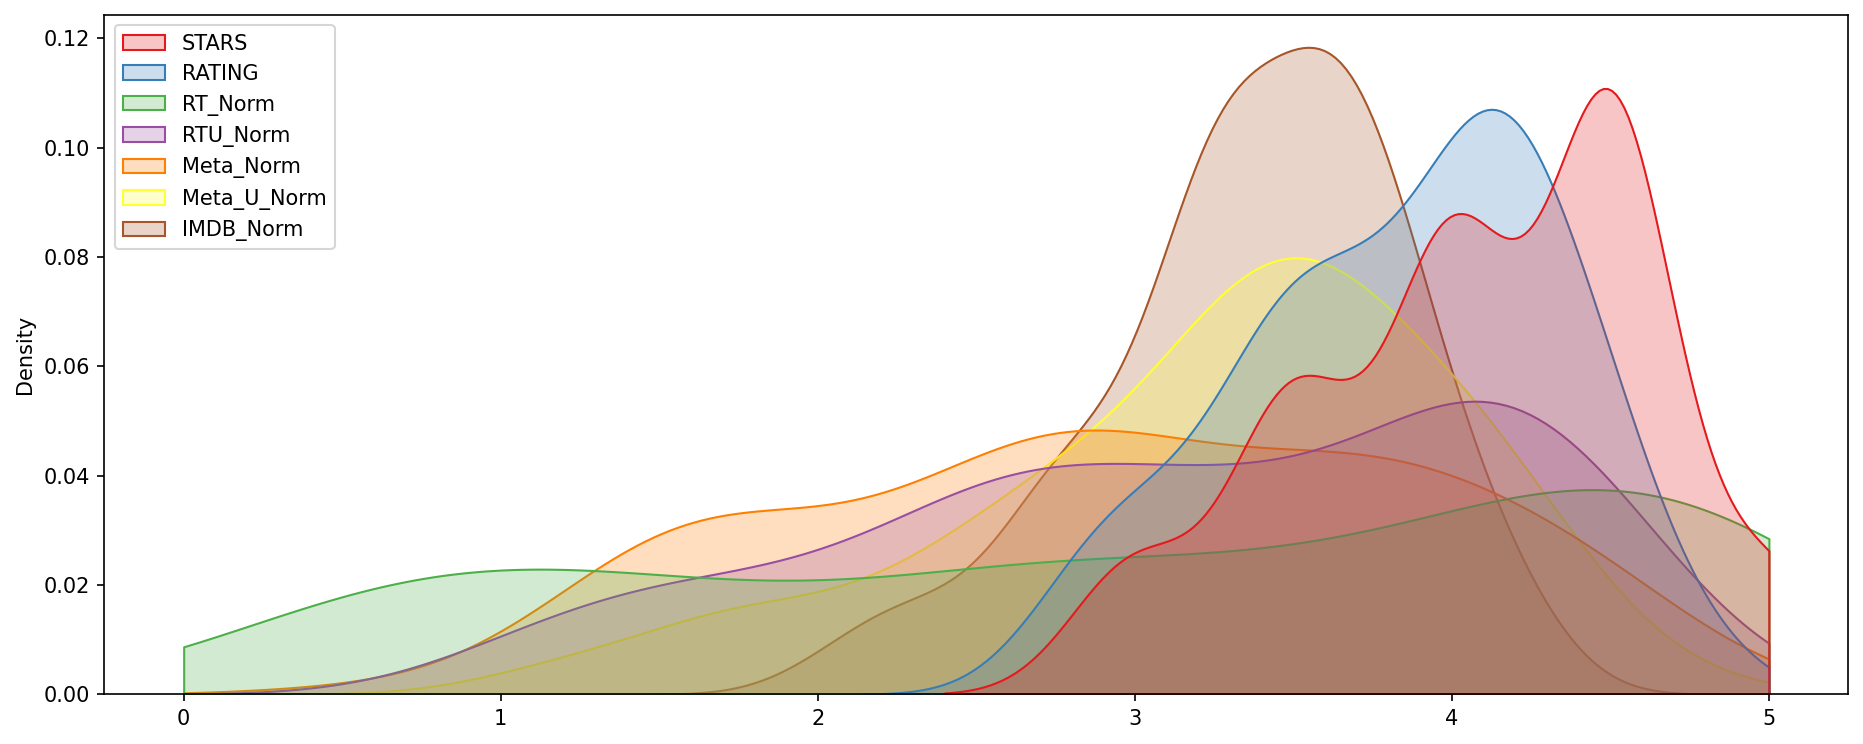

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

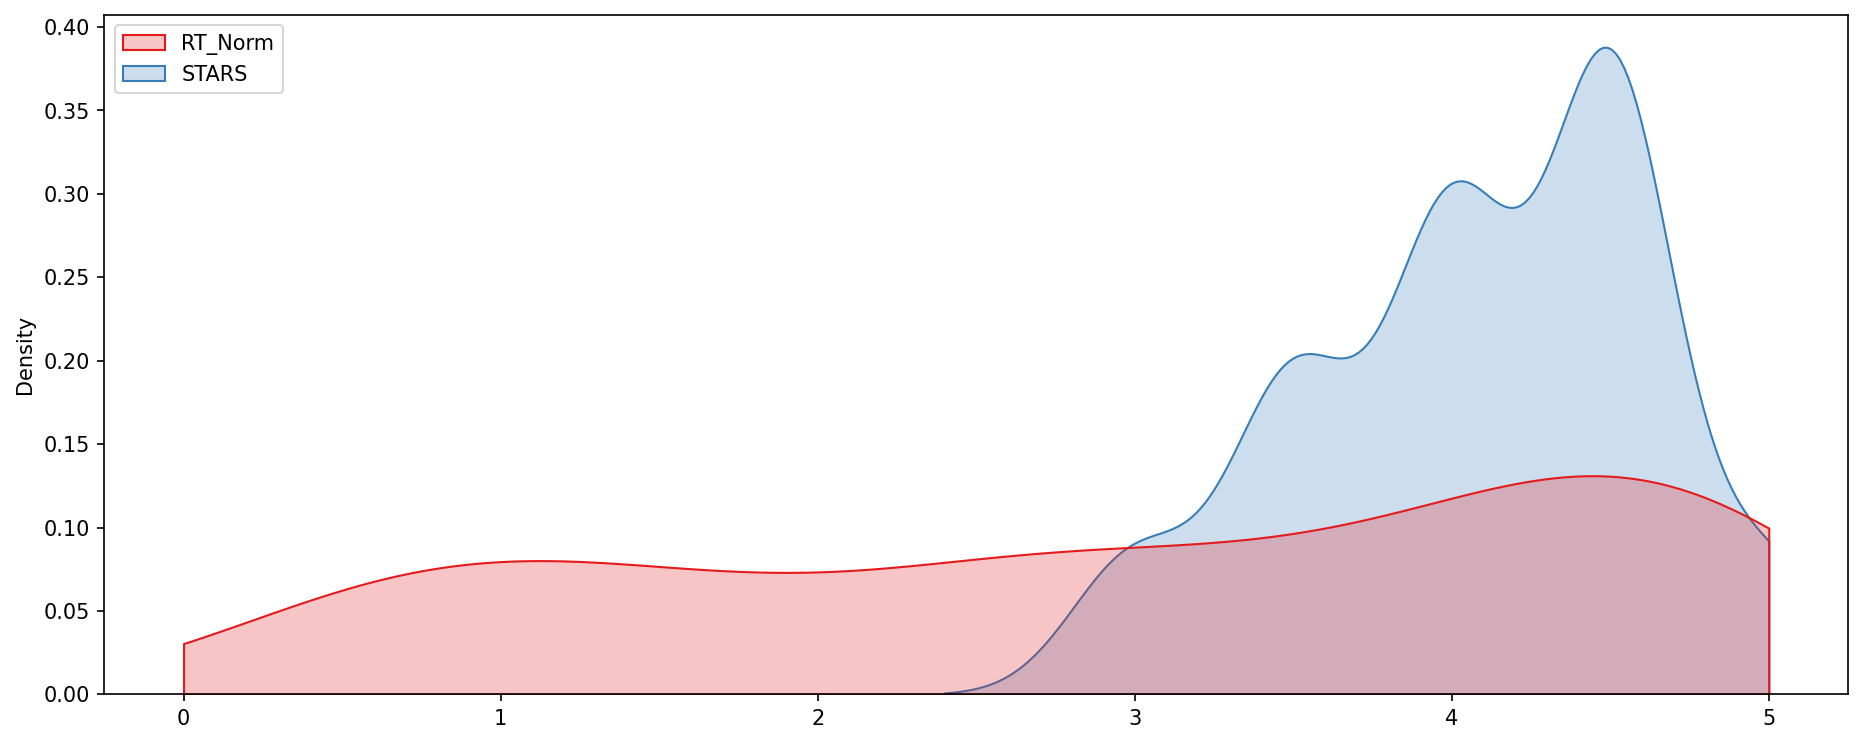

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

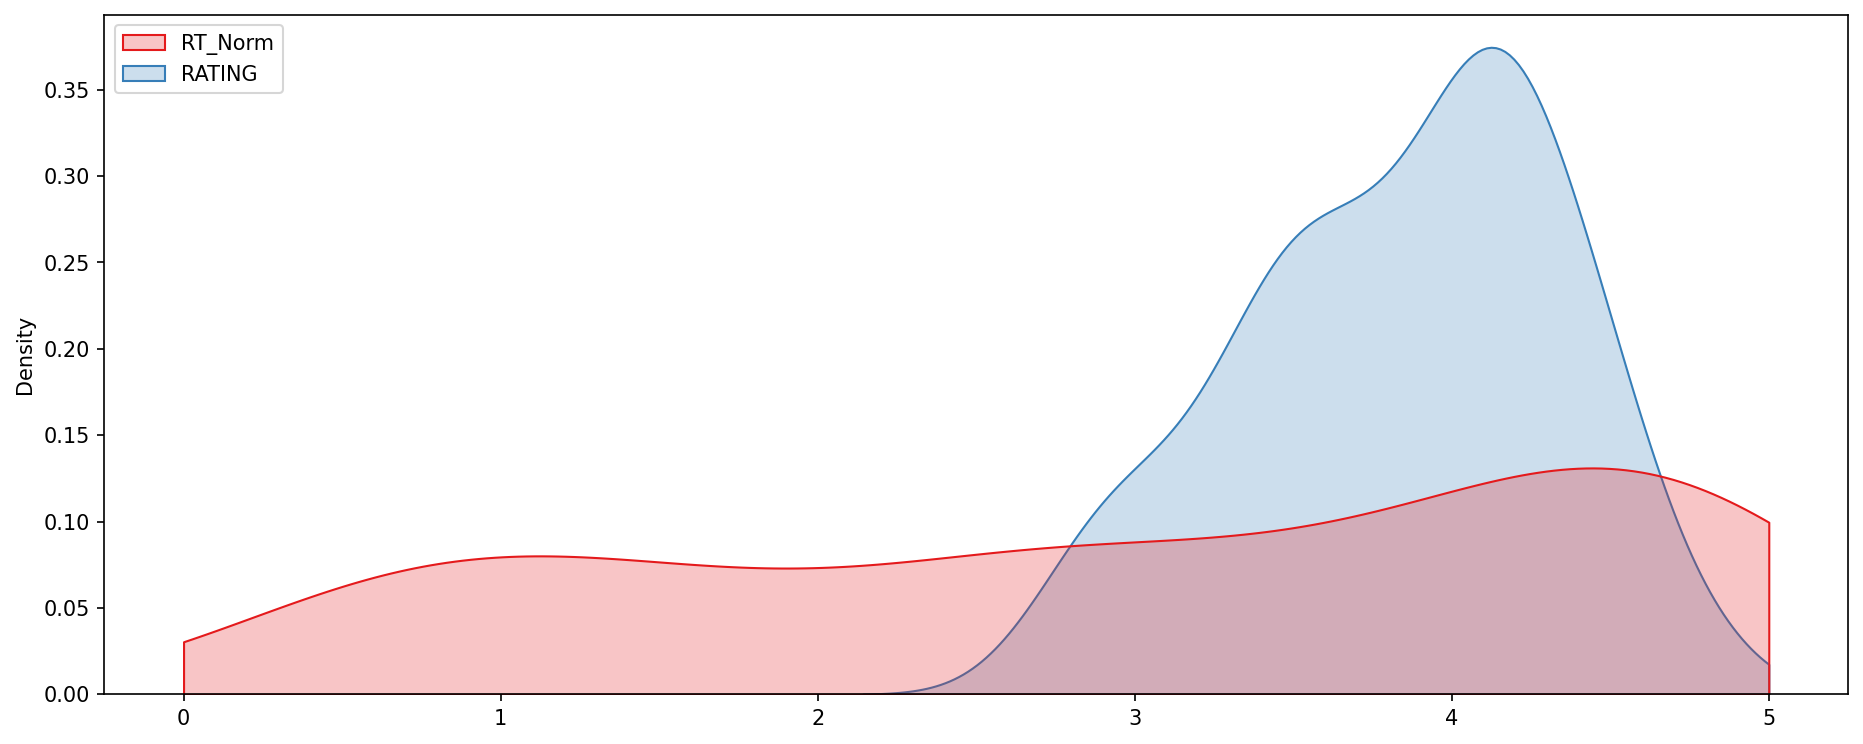

In [ ]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','RATING']],clip=[0,5],shade=True,palette='Set1',ax=ax)
move_legend(ax, "upper left")

Official RT critics, more or less review movies in a balanced movie. but 
FANDANGO scores imply there are no bad movies. 


OPTIONAL TASK: Create a histplot comparing all normalized scores.

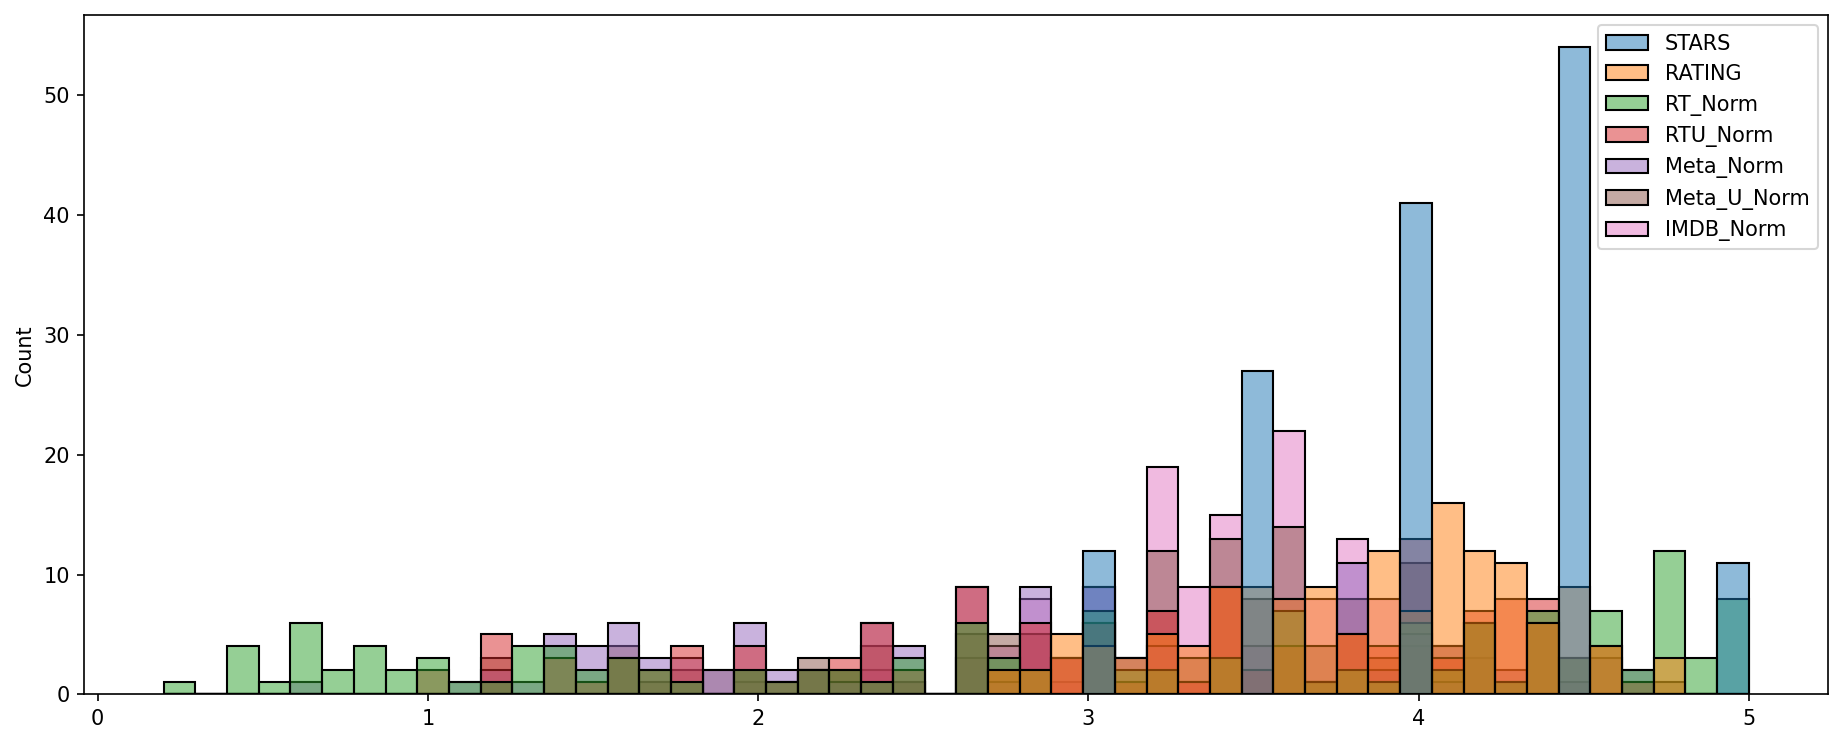

In [ ]:
plt.subplots(figsize=(15,6),dpi=150)
sns.histplot(norm_scores,bins=50)

Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating.  

Let's examine the top 10 worst movies.  

Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? 

You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.

In [ ]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [ ]:
norm_films = df[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm','FILM']]

In [ ]:
norm_films.nsmallest(10,'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

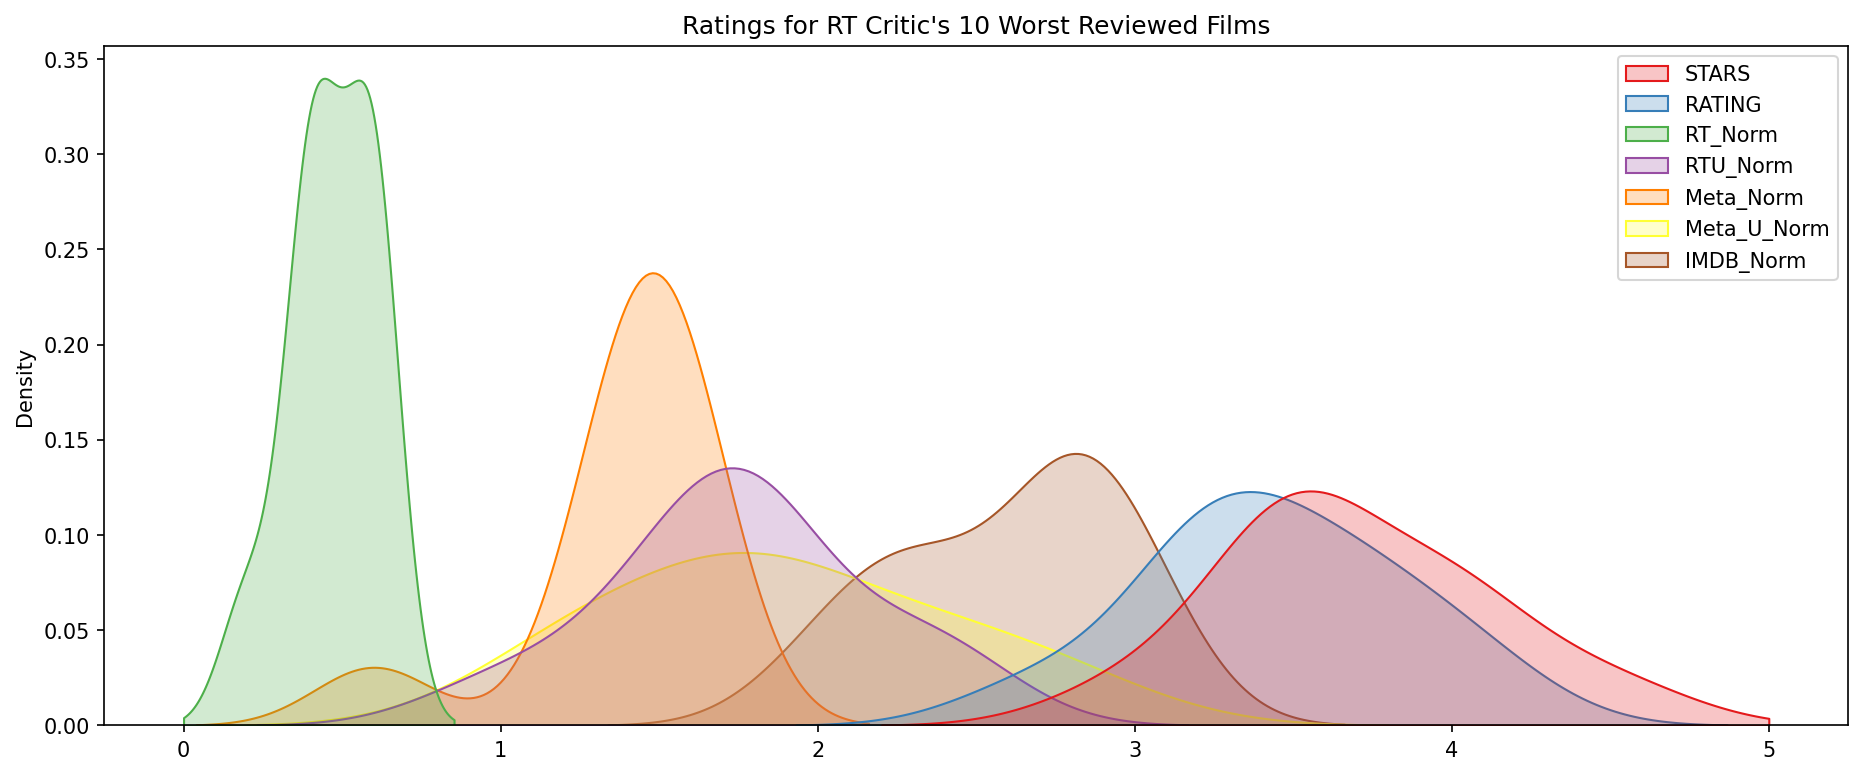

In [ ]:
print('\n\n')
plt.figure(figsize=(15,6),dpi=150)
worst_films = norm_films.nsmallest(10,'RT_Norm').drop('FILM',axis=1)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
plt.title("Ratings for RT Critic's 10 Worst Reviewed Films");

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

In [ ]:
norm_films.iloc[25]

STARS                     4.5
RATING                    4.1
RT_Norm                   0.4
RTU_Norm                  2.3
Meta_Norm                 1.3
Meta_U_Norm               2.3
IMDB_Norm                 3.0
FILM           Taken 3 (2015)
Name: 25, dtype: object

In [ ]:
(0.4+2.3+1.3+2.3+3)/5

1.86